# Hello Quantum World ... ;)

Importamos las librerías necesarias para ejecutar

In [1]:
from qiskit import *
#Comando para que las graficas se vean en el notebook
%matplotlib inline

Se crean 2 registros cuánticos y 2 clásicos

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

Se añaden los registros al circuito

In [6]:
circuit = QuantumCircuit(qr, cr)

In [7]:
circuit.draw()

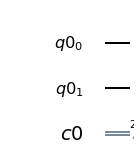

In [8]:
circuit.draw(output='mpl')

In [9]:
qr = QuantumRegister(2, 'quantum')
cr = ClassicalRegister(2, 'classical')

In [15]:
circuit.draw()

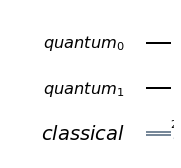

In [12]:
circuit.draw(output='mpl')

### Puertas single-qubit

Aplicar una puerta H (Hadamard) al qubit 0 del circuito

In [16]:
circuit.h(qr[0])

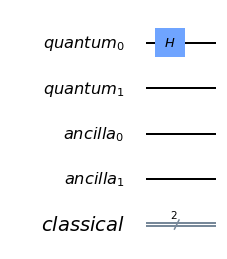

In [17]:
circuit.draw(output='mpl')

### Puertas multiquibit

Aplicar una puerta control-x o controlled NOT entre el primer y segundo qbit (qbit 0 y qbit 1 respectivamente)

In [18]:
circuit.cx(qr[0], qr[1])

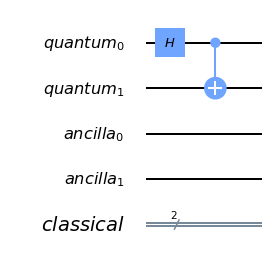

In [19]:
circuit.draw(output='mpl')

Con este circuito tenemos entrelazamiento, pero para ver los resultados es necesario colapsar el estado en los registros clásicos

In [20]:
circuit.measure(qr, cr)

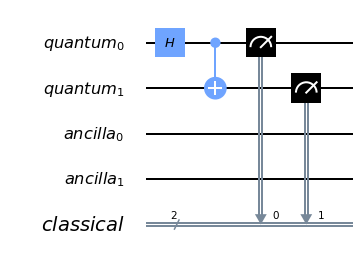

In [21]:
circuit.draw(output='mpl')

El backend (entorno donde se va a ejecutar) va a ser un entorno que simula un ordenador cúantico real.

Los posibles valores:
- qasm_simulator

Para poder ejecutar los de debajo es necesario tener cargada la cuenta de IBM --> existe un ejemplo más adelante hay un ejemplo
- ibmq_16_melbourne
- ibmq_ourense
- ibmq_vigo
- ibmq_london
- ibmq_burlington
- ibmq_essex
- ibmq_armonk
- Ibmq_5_yorktown - ibmqx2


In [22]:
backend = Aer.get_backend('qasm_simulator')

In [23]:
result = execute(circuit, backend=backend).result()

Para visualizar mejor los resultados usaremos la función _plot_histogram_ que provee qiskit

In [24]:
from qiskit.tools.visualization import plot_histogram

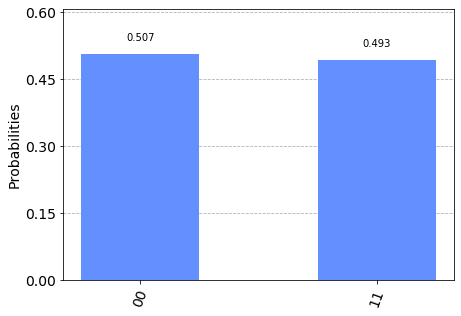

In [25]:
plot_histogram(result.get_counts(circuit))

In [26]:
'''
    El IMB_TOKEN se puede obtener en: https://quantum-computing.ibm.com/account
'''

#IBMQ.save_account('IMB_TOKEN', overwrite=True)

'\n    El IMB_TOKEN se puede obtener en: https://quantum-computing.ibm.com/account\n'

In [27]:
IBMQ.load_account()

/opt/anaconda3/envs/name_of_my_env/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [28]:
provider = IBMQ.get_provider(group='open')
provider.backends()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [29]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmqx2')

In [30]:
job = execute(circuit, backend=qcomp)

In [31]:
from qiskit.tools.monitor import job_monitor

In [32]:
job_monitor(job)

Job Status: job has successfully run


In [33]:
result = job.result()

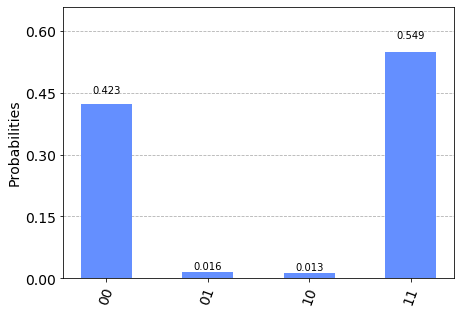

In [34]:
plot_histogram(result.get_counts(circuit))